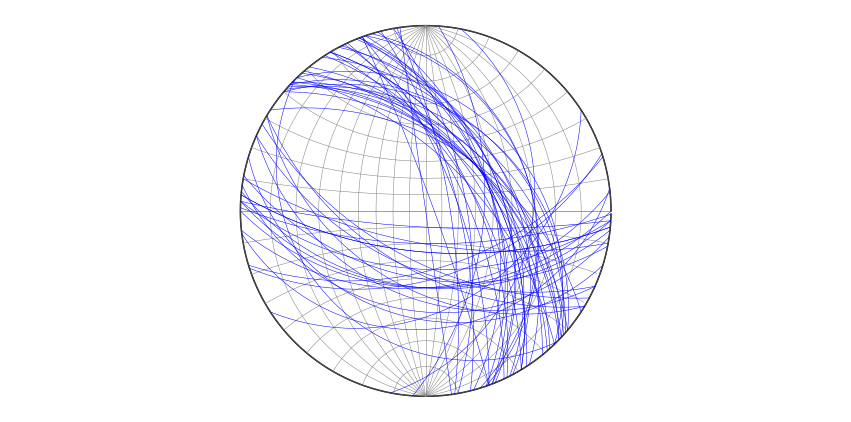

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

# Import Stereonet and related functions
import sys, os
sys.path.append(os.path.abspath('../functions'))
from Pole import Pole
from GreatCircle import GreatCircle
from GeogrToView import GeogrToView
from Stereonet import Stereonet

# Draw a lower hemisphere equal angle stereonet, 
# 10 deg interval grid
trdv, plgv, intrad = np.radians([0, 90, 10]) 
Stereonet(trdv,plgv,intrad,0)

# Read the strike-dip data from the Big Elk anticline
beasd = np.loadtxt(os.path.abspath('../data/ch5-6/beasd.txt'))

# Plot the great circles
for i in range(beasd.shape[0]):
    path = GreatCircle(beasd[i,0]*pi/180,beasd[i,1]*pi/180,0)
    plt.plot(path[:,0], path[:,1], 'b', linewidth=0.5)

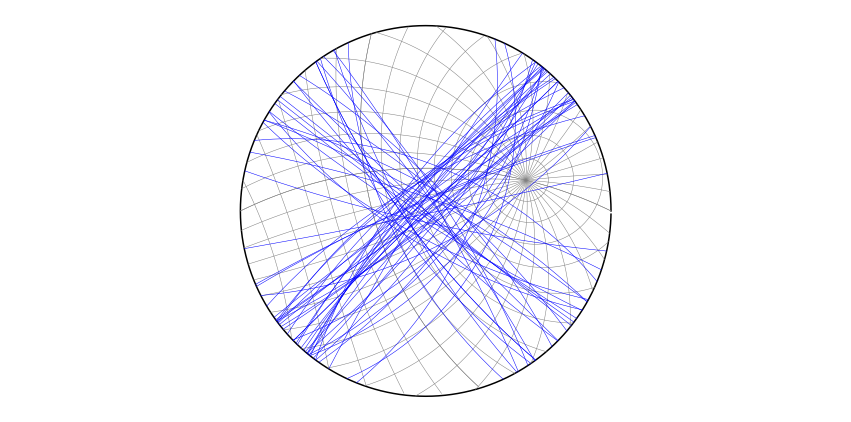

In [2]:
# Draw the same data in an equal angle stereonet,
# but make the view direction = fold axis
trdv, plgv = np.radians([125, 26]) 
Stereonet(trdv,plgv,intrad,0)

# Plot the great circles
for i in range(beasd.shape[0]):
    # pole to bed
    trdp, plgp =  Pole(beasd[i,0]*pi/180,beasd[i,1]*pi/180,1)
    # transform pole
    trdpt, plgpt = GeogrToView(trdp,plgp,trdv,plgv)
    # bed from transformed pole
    striket, dipt = Pole(trdpt,plgpt,0)
    # plot great circle
    path = GreatCircle(striket,dipt,0)
    plt.plot(path[:,0], path[:,1], 'b', linewidth=0.5) 